In [1]:
%matplotlib inline
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

/home/sam/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [52]:
# https://openflights.org/data.html
airports = pd.read_csv(
    os.path.join('data', 'airports.csv')
)
airports.shape
"""
Airport ID	Unique OpenFlights identifier for this airport.
Name	Name of airport. May or may not contain the City name.
City	Main city served by airport. May be spelled differently from Name.
Country	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
IATA	3-letter IATA code. Null if not assigned/unknown.
ICAO	4-letter ICAO code.
Null if not assigned.
Latitude	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
Longitude	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
Altitude	In feet.
Timezone	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
DST	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
Tz database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
Type	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
Source	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.
"""

'\nAirport ID\tUnique OpenFlights identifier for this airport.\nName\tName of airport. May or may not contain the City name.\nCity\tMain city served by airport. May be spelled differently from Name.\nCountry\tCountry or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.\nIATA\t3-letter IATA code. Null if not assigned/unknown.\nICAO\t4-letter ICAO code.\nNull if not assigned.\nLatitude\tDecimal degrees, usually to six significant digits. Negative is South, positive is North.\nLongitude\tDecimal degrees, usually to six significant digits. Negative is West, positive is East.\nAltitude\tIn feet.\nTimezone\tHours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.\nDST\tDaylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time\nTz database time zone\tTimezone in "tz" (Olson) format, eg. "America/Los_Angeles".\nType\tType of the air

In [51]:
print(airports.columns)
airports[airports['Country'] == 'United States']


Index(['Airport_ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Null',
       'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type',
       'Source'],
      dtype='object')


,Airport_ID,Name,City,Country,IATA,ICAO,Null,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
3212,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9,A,America/Anchorage,airport,OurAirports,NaN
3213,3412,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001,35,-9,A,America/Anchorage,airport,OurAirports,NaN
3214,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9,A,America/Anchorage,airport,OurAirports,NaN
3215,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9,A,America/Anchorage,airport,OurAirports,NaN
3216,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10,N,Pacific/Honolulu,airport,OurAirports,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,13717,Camp Pendleton MCAS (Munn Field) Airport,Oceanside,United States,\N,KNFG,33.301300,-117.355003,78,\N,\N,\N,airport,OurAirports,NaN
7651,13757,Vidalia Regional Airport,Vidalia,United States,VDI,KVDI,32.192699,-82.371201,275,-4,A,\N,airport,OurAirports,NaN
7652,13758,Granbury Regional Airport,Granbury,United States,\N,KGDJ,32.444401,-97.816902,778,-5,A,\N,airport,OurAirports,NaN
7653,13759,Oswego County Airport,Fulton,United States,\N,KFZY,43.350800,-76.388100,475,-4,A,\N,airport,OurAirports,NaN


In [10]:
# https://datahub.io/core/oil-prices#data
brent = pd.read_csv(
    os.path.join('data', 'brent-monthly_csv.csv')
)
brent.shape

(395, 2)

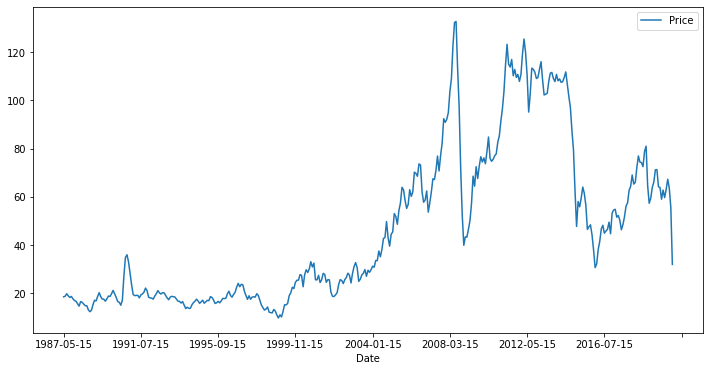

In [19]:
brent.set_index('Date').plot(figsize=(12,6))

In [20]:
wti = pd.read_csv(
    os.path.join('data', 'wti-monthly_csv.csv')
)
wti.shape

(411, 2)

,Date,Price
0,1986-01-15,22.93
1,1986-02-15,15.46
2,1986-03-15,12.61
3,1986-04-15,12.84
4,1986-05-15,15.38


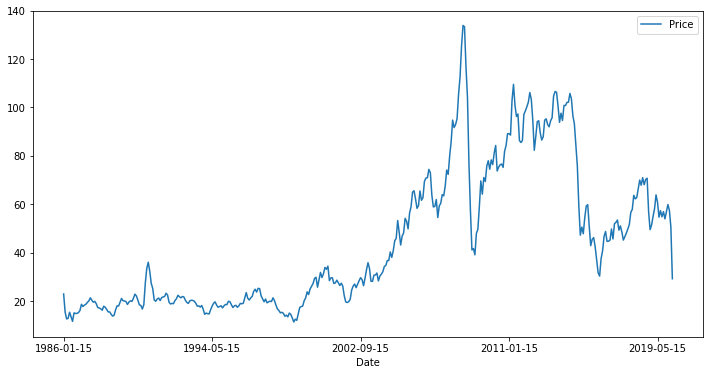

In [24]:
wti.set_index('Date').plot(figsize=(12,6))
wti.head()

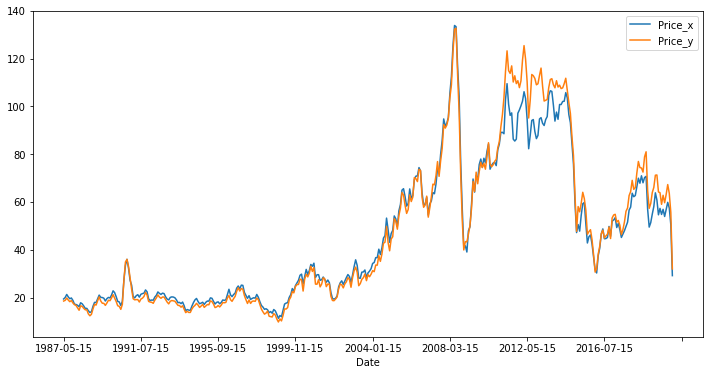

In [26]:
wti.merge(brent, on="Date").set_index('Date').plot(figsize=(12,6))